In [1]:
import requests

In [2]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import folium
import geoplot as gplt
import geoplot.crs as gcrs
import ipywidgets as widgets

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#import url + 'query' to the end
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

In [5]:
#collect data from a certain timeframe
payload = {'format':'csv',
          'starttime':'1990-01-01',
          'minlatitude': '34.722003',
          'maxlatitude': '36.930821',
          'minlongitude': '-90.451176',
          'maxlongitude': '-81.479711'}

In [6]:
#r means response
r = requests.get(url=url, params=payload)

In [7]:
print(r.url)

https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=1990-01-01&minlatitude=34.722003&maxlatitude=36.930821&minlongitude=-90.451176&maxlongitude=-81.479711


In [8]:
from io import StringIO

In [9]:
eq = pd.read_csv(r.url)
eq.shape

(6489, 22)

In [10]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489 entries, 0 to 6488
Data columns (total 22 columns):
time               6489 non-null object
latitude           6489 non-null float64
longitude          6489 non-null float64
depth              6489 non-null float64
mag                6489 non-null float64
magType            6489 non-null object
nst                5972 non-null float64
gap                5968 non-null float64
dmin               5764 non-null float64
rms                5980 non-null float64
net                6489 non-null object
id                 6489 non-null object
updated            6489 non-null object
place              6489 non-null object
type               6489 non-null object
horizontalError    6033 non-null float64
depthError         6032 non-null float64
magError           5945 non-null float64
magNst             5965 non-null float64
status             6489 non-null object
locationSource     6489 non-null object
magSource          6489 non-null object
d

In [11]:
#extract only Tennessee
eq = eq[eq['place'].str.contains('Tennessee', na=False)]

In [12]:
eq.shape

(3481, 22)

In [13]:
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3,2019-10-31T08:41:44.610Z,36.273833,-89.507667,7.64,1.78,md,21.0,41.0,0.01800,0.07,...,2019-10-31T11:59:40.290Z,"2km WNW of Ridgely, Tennessee",earthquake,0.16,0.34,0.102,17.0,reviewed,nm,nm
5,2019-10-30T12:12:32.190Z,36.273167,-89.508667,7.24,1.14,md,8.0,86.0,0.01723,0.07,...,2019-10-31T15:41:55.060Z,"2km WNW of Ridgely, Tennessee",earthquake,0.47,0.65,0.013,5.0,reviewed,nm,nm
6,2019-10-28T05:30:07.850Z,36.274000,-89.504667,7.92,1.51,md,17.0,86.0,0.04154,0.07,...,2019-10-28T12:45:49.390Z,"1km NW of Ridgely, Tennessee",earthquake,0.41,0.79,0.075,12.0,reviewed,nm,nm
7,2019-10-28T02:45:27.350Z,36.439000,-89.524500,8.71,1.29,md,21.0,55.0,0.05760,0.05,...,2019-10-28T12:54:16.790Z,"8km NW of Tiptonville, Tennessee",earthquake,0.34,0.51,0.044,8.0,reviewed,nm,nm
8,2019-10-27T08:32:04.040Z,36.274667,-89.511833,8.07,1.59,md,12.0,85.0,0.04607,0.05,...,2019-10-27T16:24:23.230Z,"2km WNW of Ridgely, Tennessee",earthquake,0.41,0.61,0.046,11.0,reviewed,nm,nm


In [14]:
eq.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
6481,1990-01-14T14:18:08.190Z,36.189,-89.511,8.1,1.5,md,NaN,NaN,NaN,NaN,...,2016-04-14T18:26:58.870Z,"8km SSW of Ridgely, Tennessee",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm
6482,1990-01-13T01:55:58.030Z,35.782,-89.329,19.4,1.7,md,NaN,NaN,NaN,NaN,...,2016-04-14T18:26:52.050Z,"12km SSE of Halls, Tennessee",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm
6484,1990-01-11T12:18:11.200Z,36.460,-89.550,6.0,2.1,md,NaN,NaN,NaN,NaN,...,2016-04-14T18:26:31.650Z,"11km NW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm
6485,1990-01-09T10:53:31.560Z,36.109,-89.263,7.0,2.5,md,NaN,NaN,NaN,NaN,...,2016-04-14T18:26:24.910Z,"0km SSW of Newbern, Tennessee",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm
6488,1990-01-05T17:40:49.150Z,36.469,-89.535,2.6,1.5,md,NaN,NaN,NaN,NaN,...,2016-04-14T18:25:57.420Z,"11km NNW of Tiptonville, Tennessee",earthquake,NaN,NaN,NaN,NaN,reviewed,nm,nm


In [15]:
time_split = eq.time.str.split('-',expand=True)

In [16]:
eq['year'] = time_split[0]

In [17]:
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year
3,2019-10-31T08:41:44.610Z,36.273833,-89.507667,7.64,1.78,md,21.0,41.0,0.01800,0.07,...,"2km WNW of Ridgely, Tennessee",earthquake,0.16,0.34,0.102,17.0,reviewed,nm,nm,2019
5,2019-10-30T12:12:32.190Z,36.273167,-89.508667,7.24,1.14,md,8.0,86.0,0.01723,0.07,...,"2km WNW of Ridgely, Tennessee",earthquake,0.47,0.65,0.013,5.0,reviewed,nm,nm,2019
6,2019-10-28T05:30:07.850Z,36.274000,-89.504667,7.92,1.51,md,17.0,86.0,0.04154,0.07,...,"1km NW of Ridgely, Tennessee",earthquake,0.41,0.79,0.075,12.0,reviewed,nm,nm,2019
7,2019-10-28T02:45:27.350Z,36.439000,-89.524500,8.71,1.29,md,21.0,55.0,0.05760,0.05,...,"8km NW of Tiptonville, Tennessee",earthquake,0.34,0.51,0.044,8.0,reviewed,nm,nm,2019
8,2019-10-27T08:32:04.040Z,36.274667,-89.511833,8.07,1.59,md,12.0,85.0,0.04607,0.05,...,"2km WNW of Ridgely, Tennessee",earthquake,0.41,0.61,0.046,11.0,reviewed,nm,nm,2019


In [18]:
eq = eq.reindex(columns=['year','place','latitude','longitude','mag','depth'])

In [19]:
eq.sort_values(by='mag',ascending=False)

,year,place,latitude,longitude,mag,depth
415,2018,"12km NNE of Decatur, Tennessee",35.612333,-84.732000,4.40,7.87
4590,2005,"12km S of Ridgely, Tennessee",36.150167,-89.473500,4.00,15.02
5899,1997,eastern Tennessee,36.436000,-83.509000,3.80,5.00
6060,1995,eastern Tennessee,35.366000,-84.212000,3.70,10.00
246,2019,"12km NNW of Dyersburg, Tennessee",36.135833,-89.439833,3.69,14.16
1857,2015,"11km NNW of Covington, Tennessee",35.664167,-89.682333,3.50,12.69
4025,2007,"10km ENE of Spencer, Tennessee",35.792500,-85.361667,3.50,1.17
5901,1997,eastern Tennessee,35.056000,-84.808000,3.50,10.00
1396,2016,"9km NW of Tiptonville, Tennessee",36.452667,-89.534667,3.44,10.26
3414,2009,"6km NNW of Dyersburg, Tennessee",36.088500,-89.401833,3.40,9.32


In [20]:
counties = gpd.read_file('./data/TN_counties/TN_counties.shp')
counties.head( )

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,AREA,POP2000,POP2001,POP00_SQMI,WHITE,...,ASIAN,HAWN_PI,OTHER,MULT_RACE,HISPANIC,MALES,FEMALES,MED_AGE,HOUSEHOLDS,geometry
0,Stewart,Tennessee,47,161,47161,493.19726,12370,12833,25.1,11785,...,180,6,29,136,124,6158,6212,38.7,4930,"POLYGON ((-87.99034 36.360777, -87.99043500000..."
1,Robertson,Tennessee,47,147,47147,476.52281,54433,56161,114.2,48518,...,169,12,451,438,1447,27051,27382,35.4,19906,"POLYGON ((-87.12044299999999 36.45546, -87.120..."
2,Sumner,Tennessee,47,165,47165,543.32364,130449,133752,240.1,119344,...,856,38,1047,1251,2291,63876,66573,36.1,48941,"POLYGON ((-86.22843399999999 36.487472, -86.22..."
3,Montgomery,Tennessee,47,125,47125,543.83607,134768,138524,247.8,98611,...,2455,287,2939,3919,6960,67775,66993,30.0,48330,"POLYGON ((-87.592358 36.367663, -87.59403 36.3..."
4,Macon,Tennessee,47,111,47111,307.18934,20386,21029,66.4,19949,...,48,14,157,89,349,10061,10325,35.5,7916,"POLYGON ((-85.978894 36.426073, -85.989693 36...."


In [21]:
counties.columns

Index(['NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'AREA',
       'POP2000', 'POP2001', 'POP00_SQMI', 'WHITE', 'BLACK', 'AMERI_ES',
       'ASIAN', 'HAWN_PI', 'OTHER', 'MULT_RACE', 'HISPANIC', 'MALES',
       'FEMALES', 'MED_AGE', 'HOUSEHOLDS', 'geometry'],
      dtype='object')

In [22]:
counties=counties.rename(columns={'NAME':'county'})

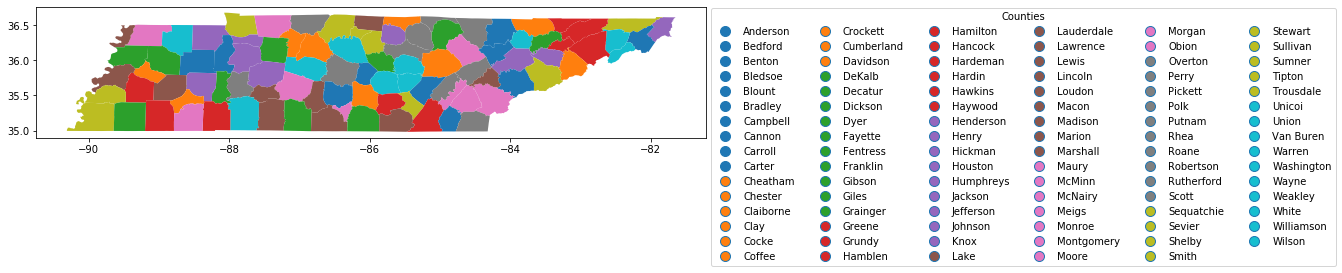

In [23]:
leg_kwds = {'title': 'Counties', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 6}

counties.plot(column = 'county', figsize=(12, 12), legend = True, legend_kwds = leg_kwds)
plt.show()

In [24]:
eq['geometry'] = eq.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
eq.head()

,year,place,latitude,longitude,mag,depth,geometry
3,2019,"2km WNW of Ridgely, Tennessee",36.273833,-89.507667,1.78,7.64,POINT (-89.5076667 36.2738333)
5,2019,"2km WNW of Ridgely, Tennessee",36.273167,-89.508667,1.14,7.24,POINT (-89.50866670000001 36.2731667)
6,2019,"1km NW of Ridgely, Tennessee",36.274000,-89.504667,1.51,7.92,POINT (-89.5046667 36.274)
7,2019,"8km NW of Tiptonville, Tennessee",36.439000,-89.524500,1.29,8.71,POINT (-89.5245 36.439)
8,2019,"2km WNW of Ridgely, Tennessee",36.274667,-89.511833,1.59,8.07,POINT (-89.51183329999999 36.2746667)


In [25]:
counties.crs

{'init': 'epsg:4269'}

In [26]:
eq = gpd.GeoDataFrame(eq, crs = counties.crs, geometry = eq['geometry'])

In [27]:
type(eq)

geopandas.geodataframe.GeoDataFrame

In [28]:
eq.crs

{'init': 'epsg:4269'}

In [29]:
eq.isnull().sum()

year         0
place        0
latitude     0
longitude    0
mag          0
depth        0
geometry     0
dtype: int64

In [30]:
counties.isnull().sum()

county        0
STATE_NAME    0
STATE_FIPS    0
CNTY_FIPS     0
FIPS          0
AREA          0
POP2000       0
POP2001       0
POP00_SQMI    0
WHITE         0
BLACK         0
AMERI_ES      0
ASIAN         0
HAWN_PI       0
OTHER         0
MULT_RACE     0
HISPANIC      0
MALES         0
FEMALES       0
MED_AGE       0
HOUSEHOLDS    0
geometry      0
dtype: int64

In [31]:
eq_counties = gpd.sjoin(eq, counties, op = 'within')

In [32]:
eq_counties.head()

,year,place,latitude,longitude,mag,depth,geometry,index_right,county,STATE_NAME,...,AMERI_ES,ASIAN,HAWN_PI,OTHER,MULT_RACE,HISPANIC,MALES,FEMALES,MED_AGE,HOUSEHOLDS
3,2019,"2km WNW of Ridgely, Tennessee",36.273833,-89.507667,1.78,7.64,POINT (-89.5076667 36.2738333),19,Lake,Tennessee,...,31,11,0,49,82,109,4785,3169,35.8,2410
5,2019,"2km WNW of Ridgely, Tennessee",36.273167,-89.508667,1.14,7.24,POINT (-89.50866670000001 36.2731667),19,Lake,Tennessee,...,31,11,0,49,82,109,4785,3169,35.8,2410
6,2019,"1km NW of Ridgely, Tennessee",36.274000,-89.504667,1.51,7.92,POINT (-89.5046667 36.274),19,Lake,Tennessee,...,31,11,0,49,82,109,4785,3169,35.8,2410
7,2019,"8km NW of Tiptonville, Tennessee",36.439000,-89.524500,1.29,8.71,POINT (-89.5245 36.439),19,Lake,Tennessee,...,31,11,0,49,82,109,4785,3169,35.8,2410
8,2019,"2km WNW of Ridgely, Tennessee",36.274667,-89.511833,1.59,8.07,POINT (-89.51183329999999 36.2746667),19,Lake,Tennessee,...,31,11,0,49,82,109,4785,3169,35.8,2410


In [33]:
eq_counties = eq_counties.reindex(columns=['year','place','county','region','latitude','longitude','mag','depth','geometry'])
eq_counties.head()

,year,place,county,region,latitude,longitude,mag,depth,geometry
3,2019,"2km WNW of Ridgely, Tennessee",Lake,NaN,36.273833,-89.507667,1.78,7.64,POINT (-89.5076667 36.2738333)
5,2019,"2km WNW of Ridgely, Tennessee",Lake,NaN,36.273167,-89.508667,1.14,7.24,POINT (-89.50866670000001 36.2731667)
6,2019,"1km NW of Ridgely, Tennessee",Lake,NaN,36.274000,-89.504667,1.51,7.92,POINT (-89.5046667 36.274)
7,2019,"8km NW of Tiptonville, Tennessee",Lake,NaN,36.439000,-89.524500,1.29,8.71,POINT (-89.5245 36.439)
8,2019,"2km WNW of Ridgely, Tennessee",Lake,NaN,36.274667,-89.511833,1.59,8.07,POINT (-89.51183329999999 36.2746667)


In [34]:
eq_counties=eq_counties.rename(columns={'place':'location'})

In [35]:
east_list=['Anderson',
    'Bledsoe','Blout','Bradley','Campbell','Carter',
    'Claiborne','Cocke','Cumberland','Grainger','Greene','Hamblen','Hamilton','Hancock', 
    'Hawkins','Jefferson','Knox','Loudon','McMinn','Marion','Meigs','Monroe','Morgan','Polk',
    'Rhea','Roane','Scott','Sevier','Sullivan','Unicoi','Union','Washington']

In [36]:
middle_list=['Bedford','Cannon','Cheatham','Clay','Coffee','Davidson','DeKalb','Dickson','Fentress','Franklin','Giles','Grundy','Hickman','Houston','Humphreys','Jackson','Lawrence','Lewis','Lincoln','Macon','Marshall','Maury','Montgomery','Moore','Overton','Perry','Pickett','Putnam','Robertson','Rutherford','Sequatchie','Smith','Stewart','Sumner','Trousdale','Van Buren','Warren','Wayne','White','Williamson','Wilson']

In [37]:
west_list=['Benton','Carroll','Chester','Crockett','Decatur','Dyer','Fayette','Gibson','Hardeman','Hardin','Haywood','Henderson','Henry','Lake','Lauderdale','Madison','McNairy','Obion','Shelby','Tipton','Weakley']

In [38]:
eq_counties.loc[eq_counties['county'].isin(east_list),'region'] = 'East'

In [39]:
eq_counties.loc[eq_counties['county'].isin(middle_list),'region'] = 'Middle'

In [40]:
eq_counties.loc[eq_counties['county'].isin(west_list),'region'] = 'West'

In [41]:
eq_counties.head()

,year,location,county,region,latitude,longitude,mag,depth,geometry
3,2019,"2km WNW of Ridgely, Tennessee",Lake,West,36.273833,-89.507667,1.78,7.64,POINT (-89.5076667 36.2738333)
5,2019,"2km WNW of Ridgely, Tennessee",Lake,West,36.273167,-89.508667,1.14,7.24,POINT (-89.50866670000001 36.2731667)
6,2019,"1km NW of Ridgely, Tennessee",Lake,West,36.274000,-89.504667,1.51,7.92,POINT (-89.5046667 36.274)
7,2019,"8km NW of Tiptonville, Tennessee",Lake,West,36.439000,-89.524500,1.29,8.71,POINT (-89.5245 36.439)
8,2019,"2km WNW of Ridgely, Tennessee",Lake,West,36.274667,-89.511833,1.59,8.07,POINT (-89.51183329999999 36.2746667)


In [42]:
eq_county_count=eq_counties.groupby('county').agg('count').sort_values(by='mag',ascending=False)

In [43]:
eq_county_count=eq_county_count.reset_index()

In [44]:
eq_county_count

,county,year,location,region,latitude,longitude,mag,depth,geometry
0,Lake,1428,1428,1428,1428,1428,1428,1428,1428
1,Dyer,423,423,423,423,423,423,423,423
2,Obion,279,279,279,279,279,279,279,279
3,Monroe,178,178,178,178,178,178,178,178
4,Blount,120,120,0,120,120,120,120,120
5,Loudon,91,91,91,91,91,91,91,91
6,McMinn,88,88,88,88,88,88,88,88
7,Knox,49,49,49,49,49,49,49,49
8,Rhea,36,36,36,36,36,36,36,36
9,Bradley,34,34,34,34,34,34,34,34


In [45]:
counties

,county,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,AREA,POP2000,POP2001,POP00_SQMI,WHITE,...,ASIAN,HAWN_PI,OTHER,MULT_RACE,HISPANIC,MALES,FEMALES,MED_AGE,HOUSEHOLDS,geometry
0,Stewart,Tennessee,47,161,47161,493.19726,12370,12833,25.1,11785,...,180,6,29,136,124,6158,6212,38.7,4930,"POLYGON ((-87.99034 36.360777, -87.99043500000..."
1,Robertson,Tennessee,47,147,47147,476.52281,54433,56161,114.2,48518,...,169,12,451,438,1447,27051,27382,35.4,19906,"POLYGON ((-87.12044299999999 36.45546, -87.120..."
2,Sumner,Tennessee,47,165,47165,543.32364,130449,133752,240.1,119344,...,856,38,1047,1251,2291,63876,66573,36.1,48941,"POLYGON ((-86.22843399999999 36.487472, -86.22..."
3,Montgomery,Tennessee,47,125,47125,543.83607,134768,138524,247.8,98611,...,2455,287,2939,3919,6960,67775,66993,30.0,48330,"POLYGON ((-87.592358 36.367663, -87.59403 36.3..."
4,Macon,Tennessee,47,111,47111,307.18934,20386,21029,66.4,19949,...,48,14,157,89,349,10061,10325,35.5,7916,"POLYGON ((-85.978894 36.426073, -85.989693 36...."
5,Pickett,Tennessee,47,137,47137,174.57764,4945,5011,28.3,4903,...,2,0,5,22,41,2432,2513,41.6,2091,"POLYGON ((-85.120446 36.407164, -85.1249569999..."
6,Clay,Tennessee,47,027,47027,259.25244,7976,8093,30.8,7717,...,11,9,19,79,108,3877,4099,39.9,3379,"POLYGON ((-85.285034 36.531305, -85.287361 36...."
7,Sullivan,Tennessee,47,163,47163,430.14069,153048,153079,355.8,147771,...,652,21,319,1063,1090,73860,79188,40.1,63556,"POLYGON ((-82.302386 36.393525, -82.3025290000..."
8,Johnson,Tennessee,47,091,47091,302.72940,17499,17672,57.8,16869,...,21,4,40,81,150,9344,8155,40.0,6827,"POLYGON ((-81.73554 36.41227, -81.735868999999..."
9,Scott,Tennessee,47,151,47151,533.21814,21127,21493,39.6,20817,...,25,0,22,192,120,10423,10704,34.7,8203,"POLYGON ((-84.372732 36.216779, -84.372733 36...."


In [46]:
eq_county = pd.merge(eq_county_count, counties, how='right',on="county")

In [47]:
eq_county= eq_county.reindex(columns=['county','mag','geometry_y'])
eq_county= eq_county.rename(columns={'mag':'number of earthquakes'})
eq_county= eq_county.rename(columns={'geometry_y':'geometry'})
eq_county['number of earthquakes']=eq_county['number of earthquakes'].fillna(0)
eq_county.head()

,county,number of earthquakes,geometry
0,Lake,1428.0,"POLYGON ((-89.629453 36.185382, -89.6325729999..."
1,Dyer,423.0,"POLYGON ((-89.348603 35.89453, -89.34863199999..."
2,Obion,279.0,"POLYGON ((-89.482789 36.212746, -89.482902 36...."
3,Monroe,178.0,"POLYGON ((-83.961057 35.463739, -83.9610639999..."
4,Blount,120.0,"POLYGON ((-83.794252 35.88714, -83.793584 35.8..."


In [48]:
bins = [-1, 0, 100, 500, 1500]
labels =['0', '1-100','100-500', '500-1500']
eq_county['earthquake frequency'] = pd.cut(eq_county['number of earthquakes'], bins,labels=labels)
print (eq_county)

        county  number of earthquakes  \
0         Lake                 1428.0   
1         Dyer                  423.0   
2        Obion                  279.0   
3       Monroe                  178.0   
4       Blount                  120.0   
5       Loudon                   91.0   
6       McMinn                   88.0   
7         Knox                   49.0   
8         Rhea                   36.0   
9      Bradley                   34.0   
10       Roane                   31.0   
11      Sevier                   28.0   
12       Meigs                   25.0   
13    Hamilton                   24.0   
14    Grainger                   21.0   
15        Polk                   17.0   
16     Bledsoe                   17.0   
17  Lauderdale                   15.0   
18   Jefferson                   13.0   
19   Claiborne                   12.0   
20       Union                   11.0   
21      Marion                   11.0   
22    Campbell                   10.0   
23      Gibson  

In [49]:
#eq_county.loc[eq_county['county'] == 'Lake','number of earthquakes']=500

In [50]:
#eq_county.head()

In [51]:
eq_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 4 columns):
county                   95 non-null object
number of earthquakes    95 non-null float64
geometry                 95 non-null object
earthquake frequency     95 non-null category
dtypes: category(1), float64(1), object(2)
memory usage: 3.2+ KB


In [52]:
eq_county = gpd.GeoDataFrame(eq_county, crs = counties.crs, geometry = eq_county['geometry'])

In [53]:
eq_county.crs

{'init': 'epsg:4269'}

In [54]:
eq_counties.groupby('region').agg('count').sort_values(by='mag',ascending=False)

,year,location,county,latitude,longitude,mag,depth,geometry
region,,,,,,,,
West,2176,2176,2176,2176,2176,2176,2176,2176
East,732,732,732,732,732,732,732,732
Middle,26,26,26,26,26,26,26,26


In [55]:
eq_counties.sort_values(by='mag',ascending=False)

,year,location,county,region,latitude,longitude,mag,depth,geometry
415,2018,"12km NNE of Decatur, Tennessee",Meigs,East,35.612333,-84.732000,4.40,7.87,POINT (-84.73200000000001 35.6123333)
4590,2005,"12km S of Ridgely, Tennessee",Dyer,West,36.150167,-89.473500,4.00,15.02,POINT (-89.4735 36.1501667)
5899,1997,eastern Tennessee,Claiborne,East,36.436000,-83.509000,3.80,5.00,POINT (-83.509 36.436)
6060,1995,eastern Tennessee,Monroe,East,35.366000,-84.212000,3.70,10.00,POINT (-84.212 35.366)
246,2019,"12km NNW of Dyersburg, Tennessee",Dyer,West,36.135833,-89.439833,3.69,14.16,POINT (-89.4398333 36.1358333)
5901,1997,eastern Tennessee,Bradley,East,35.056000,-84.808000,3.50,10.00,POINT (-84.80799999999999 35.056)
4025,2007,"10km ENE of Spencer, Tennessee",Van Buren,Middle,35.792500,-85.361667,3.50,1.17,POINT (-85.3616667 35.7925)
1857,2015,"11km NNW of Covington, Tennessee",Lauderdale,West,35.664167,-89.682333,3.50,12.69,POINT (-89.6823333 35.6641667)
3414,2009,"6km NNW of Dyersburg, Tennessee",Dyer,West,36.088500,-89.401833,3.40,9.32,POINT (-89.40183329999999 36.0885)
6154,1993,"8km SSE of Ridgely, Tennessee",Dyer,West,36.196000,-89.442000,3.40,6.90,POINT (-89.44200000000001 36.196)


In [56]:
eq_counties.sort_values(by='depth',ascending=False)

,year,location,county,region,latitude,longitude,mag,depth,geometry
4822,2004,"9km S of Decatur, Tennessee",McMinn,East,35.425000,-84.790000,1.40,37.30,POINT (-84.79000000000001 35.425)
5542,2000,"10km NNW of Lenoir City, Tennessee",Loudon,East,35.880333,-84.314833,1.80,28.57,POINT (-84.3148333 35.8803333)
209,2019,"7km SSE of Rockwood, Tennessee",Roane,East,35.800333,-84.659667,2.05,28.29,POINT (-84.6596667 35.8003333)
3865,2008,"5km W of Madisonville, Tennessee",Monroe,East,35.520167,-84.419333,0.20,28.04,POINT (-84.41933330000001 35.5201667)
4827,2004,"5km NNW of Madisonville, Tennessee",Monroe,East,35.568000,-84.381000,1.40,27.70,POINT (-84.381 35.568)
3599,2009,"8km NW of Mascot, Tennessee",Knox,East,36.109333,-83.824167,0.80,27.52,POINT (-83.82416670000001 36.1093333)
1151,2017,"14km N of Maynardville, Tennessee",Union,East,36.385667,-83.795333,2.43,27.26,POINT (-83.7953333 36.3856667)
805,2018,"9km N of Lenoir City, Tennessee",Loudon,East,35.885833,-84.265833,2.28,27.22,POINT (-84.2658333 35.8858333)
1353,2016,"12km NNW of Lenoir City, Tennessee",Loudon,East,35.888667,-84.327833,1.75,26.32,POINT (-84.32783329999999 35.8886667)
1888,2015,"10km ESE of Mascot, Tennessee",Jefferson,East,36.054500,-83.674000,2.48,25.49,POINT (-83.67399999999999 36.0545)


In [57]:
eq_counties.crs

{'init': 'epsg:4269'}

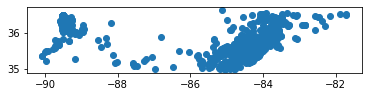

In [58]:
eq_counties.plot()

In [59]:
type(eq_counties)

geopandas.geodataframe.GeoDataFrame

leg_kwds = {'title': 'Regions', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 6}

eq_counties.plot(column = 'county', figsize=(12, 12), legend = True, legend_kwds = leg_kwds)
plt.show()

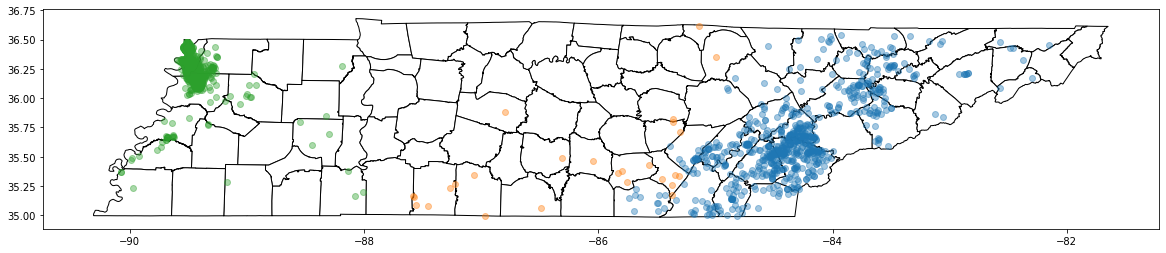

In [60]:
fig, ax = plt.subplots(figsize = (20,20))
counties.plot(ax=ax, color='white', edgecolor='black')
eq_counties.groupby('region').plot(ax=ax, alpha=0.4);

In [61]:
ax = gplt.polyplot(counties, figsize = (20,20))
gplt.pointplot(eq_counties, ax=ax, hue='mag', k=15, legend=True, ncol=);
leg_kwds = {'title': 'Number of Earthquakes', 'loc': 'lower right', 'ncol': 1}

SyntaxError: invalid syntax (<ipython-input-61-f5a6b52abd74>, line 2)

In [ ]:
eq_county.plot()

In [1]:
eq_county.head()

NameError: name 'eq_county' is not defined

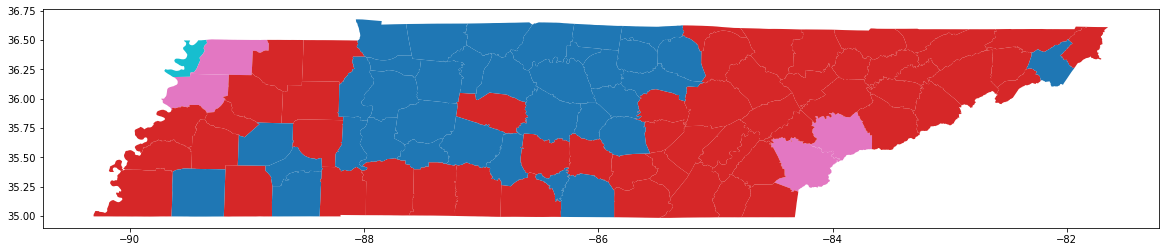

In [62]:
leg_kwds = {'title': 'Number of Earthquakes', 'loc': 'lower right', 'ncol': 1}

eq_county.plot(column='earthquake frequency', legend=False, figsize = (20,20), legend_kwds=leg_kwds);

In [65]:
eq_county['earthquake frequency'].value_counts()

1-100       55
0           35
100-500      4
500-1500     1
Name: earthquake frequency, dtype: int64

In [63]:
eq_county.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 4 columns):
county                   95 non-null object
number of earthquakes    95 non-null float64
geometry                 95 non-null object
earthquake frequency     95 non-null category
dtypes: category(1), float64(1), object(2)
memory usage: 3.2+ KB


In [64]:
eq_county.head()

,county,number of earthquakes,geometry,earthquake frequency
0,Lake,1428.0,"POLYGON ((-89.629453 36.185382, -89.6325729999...",500-1500
1,Dyer,423.0,"POLYGON ((-89.348603 35.89453, -89.34863199999...",100-500
2,Obion,279.0,"POLYGON ((-89.482789 36.212746, -89.482902 36....",100-500
3,Monroe,178.0,"POLYGON ((-83.961057 35.463739, -83.9610639999...",100-500
4,Blount,120.0,"POLYGON ((-83.794252 35.88714, -83.793584 35.8...",100-500


In [ ]:
eq_mag_count=eq_counties.groupby('mag').agg('count')

In [ ]:
eq_mag_count=eq_mag_count.reset_index()

In [ ]:
eq_mag_count

In [ ]:
ax = eq_mag_count.plot.bar(x='mag', y='year', rot=0)

In [ ]:
bins = [-1,.9, 1.9, 2.9, 3.9, 4.9]
labels =['0-.9', '1-1.9','2-2.9','3-3.9','4-4.9']
eq_mag_count['mag_bins'] = pd.cut(eq_mag_count['mag'], bins,labels=labels)
print (eq_mag_count)

In [ ]:
ax = eq_mag_count.plot.bar(x='mag_bins', y='year', rot=0)

In [ ]:
fig=plt.figure(figsize=(17,10))
eq_mag_count.groupby('mag_bins').mag_bins.value_counts().plot.barh()
plt.xlabel("Frequency",fontsize=20)
plt.ylabel("Earthquake Magnitudes",fontsize=20)
plt.title('Magnitude Frequency',fontsize=20);

In [ ]:
eq_mag_bins=eq_mag_count.groupby('mag_bins').agg('count')

In [ ]:
eq_mag_bins=eq_mag_bins.reset_index()

In [ ]:
eq_mag_bins.head()

In [ ]:
fig=plt.figure(figsize=(7,7))
eq_counties['mag'].hist()
plt.xlabel("Earthquake Magnitude",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.title('Magnitude Frequency',fontsize=20);

In [ ]:
fig=plt.figure(figsize=(20,20))
ax = eq_counties.plot.bar(x='mag_bins', y='year', rot=0)
plt.xlabel("Earthquake Magnitude",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.title('Magnitude Frequency',fontsize=20);

In [ ]:
eq_Lake=eq_counties[eq_counties.county == 'Lake'].groupby(['year','mag']).latitude.count().reset_index()

In [ ]:
eq_Lake= eq_Lake.rename(columns={'latitude':'frequency'})
eq_Lake

In [ ]:
eq_Lake.info()

In [ ]:
eq_Lake[eq_Lake.year == '1990']

In [ ]:
dropdown_year = widgets.Dropdown(options = eq_Lake.year.unique())
display(dropdown_year)

#fig=plt.figure(figsize=(20,20))
#ax = eq_Lake[eq_Lake.year == str(dropdown_year.value)].plot.bar(x='mag', y='frequency', rot=0)
#plt.xlabel("Earthquake Magnitude",fontsize=20)
#plt.ylabel("Frequency",fontsize=20)
#plt.title('Magnitude Frequency',fontsize=20);

In [ ]:
ax = eq_Lake[eq_Lake.year == str(dropdown_year.value)].plot.bar(x='mag', y='frequency', rot=0)

In [ ]:
import seaborn as sns
g=sns.FacetGrid(eq_Lake,  col="year")
g=g.map(plt.scatter, "mag","frequency",edgecolor="w")

In [ ]:
eq_Lake_year=eq_Lake.groupby('year').head()

In [ ]:
eq_Lake_year=eq_Lake_year.groupby('year').agg('count')

In [ ]:
eq_Lake_year.plot()